In [12]:
import os
import sys
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt

import torch
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from data.ReconstructionTrainingDataset import CleanSoundsDataset
from data.HyperparameterTrainingDataset import TmpNoisyDatasetForReconstructionTraining

# Parameters and helper functions

In [4]:
# Make directories
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
checkpoints_dir = f'{engram_dir}1_checkpoints/'
tensorboard_dir = f'{engram_dir}1_tensorboard/'

In [5]:
def get_dset_params(dset_mod):
    if dset_mod == None:
        print('Reconstruction on clean sounds')
        _train_datafile = 'clean_reconstruction_training_set'
        SoundsDataset = CleanSoundsDataset
        dset_kwargs = {}
    elif dset_mod == 'temp_shuffle':
        print('Reconstruction on temporally-shuffled sounds')
        _train_datafile = 'clean_reconstruction_training_set'
        SoundsDataset = CleanSoundsDataset
        dset_kwargs = {'cgram_shuffle':2}
    elif dset_mod == 'freq_shuffle':
        print('Reconstruction on frequency-shuffled sounds')
        _train_datafile = 'clean_reconstruction_training_set'
        SoundsDataset = CleanSoundsDataset
        dset_kwargs = {'cgram_shuffle':1}
    elif dset_mod == 'noisy':
        print('Reconstruction on noisy sounds')
        _train_datafile = 'hyperparameter_pooled_training_dataset_random_order_noNulls'
        SoundsDataset = TmpNoisyDatasetForReconstructionTraining
        dset_kwargs = {}
    else:
        raise ValueError('Unrecognized dataset modification')
        
    return _train_datafile, SoundsDataset, dset_kwargs

# Plot some cgrams

In [16]:
_train_datafile, SoundsDataset, dset_kwargs = get_dset_params('temp_shuffle')
train_datafile = f'{engram_dir}{_train_datafile}.hdf5'
dset = SoundsDataset(train_datafile, train=False, **dset_kwargs)

Reconstruction on temporally-shuffled sounds


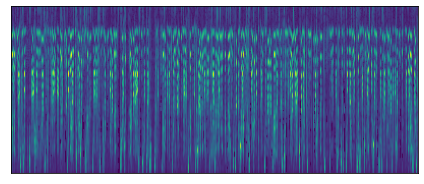

In [23]:
plt.figure()
plt.imshow(dset[0][0].numpy().squeeze())
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()

In [24]:
_train_datafile, SoundsDataset, dset_kwargs = get_dset_params('freq_shuffle')
train_datafile = f'{engram_dir}{_train_datafile}.hdf5'
dset = SoundsDataset(train_datafile, train=False, **dset_kwargs)

Reconstruction on frequency-shuffled sounds


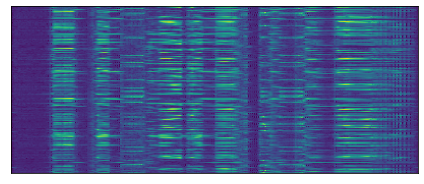

In [25]:
plt.figure()
plt.imshow(dset[0][0].numpy().squeeze())
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()